**Zero-shot classification** in NLP refers to the ability of a model to classify text into categories it has never seen during training. This is a powerful approach because traditional classification models typically require labeled data for each category. Zero-shot models, on the other hand, can generalize their understanding of language to assign text to new, unseen categories.

Zero-shot classification is especially useful in rapidly evolving domains, where the categories are constantly changing, or when labeled data is scarce. The model's ability to generalize makes it a valuable tool for many NLP applications.

Zero-shot classification uses pre-trained models like BERT or GPT that understand language patterns. These models convert both the input text and labels into vectors and predict the label with the highest similarity. The process involves:

1. **Pre-trained Language Model**: Models like BART, GPT-3, or RoBERTa are trained on large text corpora.
2. **Natural Language Prompts**: The model receives prompts for each possible class and assesses similarity.
3. **Generalization**: The model can classify new categories not seen during training.

**Use Cases** include topic classification, sentiment analysis, and intent detection.

**Benefits**:
- No labeled data needed
- Flexible for new categories

**Challenges**:
- Potentially lower accuracy compared to task-specific models
- Dependent on model quality.

In [1]:
from transformers import pipeline
import pandas as pd



The **"facebook/bart-large-mnli"** model is highly effective for zero-shot classification using a method by Yin et al., which frames classification as a natural language inference (NLI) task. Here, the text is treated as a premise, and each label is posed as a hypothesis (e.g., "This text is about politics"). The model predicts entailment, and the probabilities are used to classify the text. This method works well with large pre-trained models like BART and can be implemented in PyTorch using Hugging Face’s `Transformers` library.

In [6]:

# classifier
classifier = pipeline(task="zero-shot-classification",
                      model="facebook/bart-large-mnli",device=0)


In [23]:

#data prep
# first example: (Physics Science Dissemination) Book: "A Brief History of Time" by Stephen Hawking
# second example: (Crime) Book: "The Girl with the Dragon Tattoo" by Stieg Larsson
# third example: (Fantasy) Book: "The Name of the Wind" by Patrick Rothfuss
title = ["A Brief History of Time","The lord of the rings","The Girl with the Dragon Tattoo"]
text1 = ["In our quest to understand the universe, we've sought answers to the most fundamental questions: How did the universe begin? Does time have a beginning or end? Modern physics suggests that the universe started with the Big Bang, a massive explosion that marked the birth of space and time. But the true nature of time remains elusive. Time seems to flow in one direction—from past to future—but why? The second law of thermodynamics holds the key: it states that in any isolated system, entropy, or disorder, increases over time. This gives us the 'arrow of time.' As the universe expands, galaxies move apart, and the overall disorder of the cosmos increases. And yet, as we look deeper into the laws of physics, we encounter questions that challenge our current understanding. The nature of black holes, for example, raises paradoxes about the flow of time and information. To unravel these mysteries, we may need to explore concepts like quantum gravity, theories that unite the subatomic world with the vastness of space.",
         "Time and space, once thought to be absolute, have been redefined by the theory of relativity. Einstein showed that time is not a constant but can bend and stretch, depending on the speed of an object and its gravitational field. This means that time flows differently for different observers. Near a black hole, for example, time slows down dramatically. Such insights revolutionized our understanding of the universe. But at the quantum level, things become even more puzzling. Here, particles can exist in multiple states at once, raising profound questions about the nature of reality and our role in observing it.",
         "Einstein’s theory of relativity transformed how we view time and space. Time is not fixed but can stretch or contract, depending on speed and gravity. Near a black hole, time nearly halts. Combined with quantum mechanics, these concepts challenge our fundamental understanding of the universe's nature."

]

text2 = ["It was about eleven o’clock in the morning, mid October, with the sun not shining and a look of hard wet rain in the clearness of the foothills. I was wearing my powder-blue suit, with dark blue shirt, tie and display handkerchief, black brogues, black wool socks with dark blue clocks on them. I was neat, clean, shaved and sober, and I didn’t care who knew it. I was everything the well-dressed private detective ought to be. I was calling on four million dollars.",
             "When Mr. Bilbo Baggins of Bag End announced that he would shortly be celebrating his eleventy-first birthday with a party of special magnificence, there was much talk and excitement in Hobbiton.",
             "Welcome. And congratulations. I am delighted that you could make it. Getting here wasn’t easy, I know. In fact, I suspect it was a little tougher than you realize. To begin with, for you to be here now trillions of drifting atoms had somehow to assemble in an intricate and curiously obliging manner to create you. It’s an arrangement so specialized and particular that it has never been tried before and will only exist this once."
             ]
text3 = ["She didn’t look dangerous, but then again, that was the point. Lisbeth Salander had a gift for blending into the background, unnoticed by the world she moved through. But her mind was razor-sharp, a weapon that had cut through layers of secrets and lies that others never even saw. She had been hired to investigate the decades-old disappearance of Harriet Vanger, a young woman from one of Sweden’s wealthiest families. What started as a routine investigation soon spiraled into a web of family betrayals, corporate corruption, and sinister violence. As Lisbeth dug deeper, she uncovered not just the darkness lurking within the Vanger family but also the scars from her own past. With every step closer to the truth, she found herself navigating dangerous waters. Her sharp intellect and hacking skills were her only lifelines, and they had never failed her before. But the Vanger case was different. It was more personal, more dangerous, and there were people willing to kill to keep their secrets buried.",
         "Lisbeth Salander was not your typical investigator. With her fierce independence and exceptional hacking skills, she had a knack for uncovering hidden truths. Tasked with solving the decades-old disappearance of Harriet Vanger, Lisbeth delved deep into the Vanger family's dark history. As she uncovered long-buried secrets and disturbing family dynamics, she realized that the case was more complex than anyone had anticipated. Each clue led her further into a labyrinth of crime, betrayal, and violence. Lisbeth’s journey was not just about solving a mystery; it became a personal battle against the demons of her own past as well.",
         "Lisbeth Salander, a brilliant hacker, investigates the disappearance of Harriet Vanger. As she uncovers the Vanger family's secrets, she finds herself entwined in a web of crime and betrayal. The case forces Lisbeth to confront her own troubled past while seeking justice for a girl long lost."
         ]

documents=[text1,text2,text3]

#  candidate labels
candidate_labels = ["crime", "fantasy", "science","detectives"]

In [24]:


#  model inference
results = []
for i in range(len(documents)):
    res = classifier(documents[i], candidate_labels = candidate_labels)
    results.append(res)


In [15]:
results

[[{'sequence': "In our quest to understand the universe, we've sought answers to the most fundamental questions: How did the universe begin? Does time have a beginning or end? Modern physics suggests that the universe started with the Big Bang, a massive explosion that marked the birth of space and time. But the true nature of time remains elusive. Time seems to flow in one direction—from past to future—but why? The second law of thermodynamics holds the key: it states that in any isolated system, entropy, or disorder, increases over time. This gives us the 'arrow of time.' As the universe expands, galaxies move apart, and the overall disorder of the cosmos increases. And yet, as we look deeper into the laws of physics, we encounter questions that challenge our current understanding. The nature of black holes, for example, raises paradoxes about the flow of time and information. To unravel these mysteries, we may need to explore concepts like quantum gravity, theories that unite the su

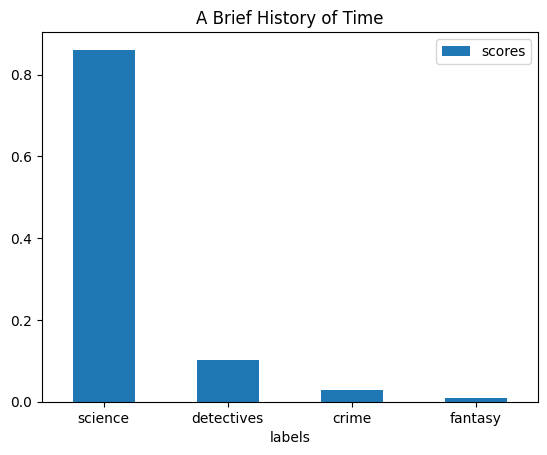

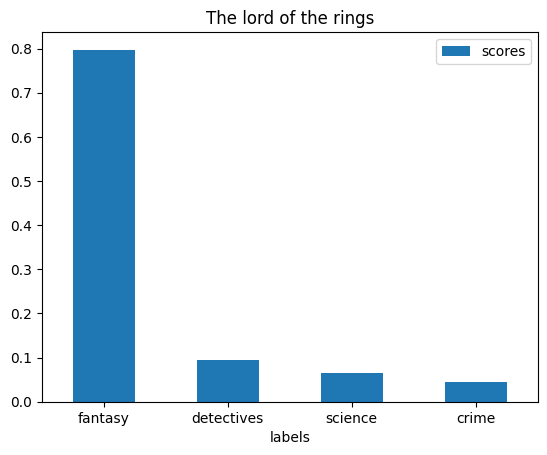

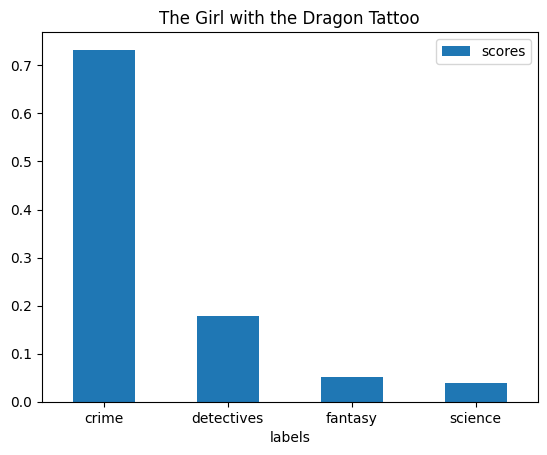

In [25]:

#  visualise result
for i in range(len(results)):
    pd.DataFrame(results[i][1]).plot.bar(x='labels', y='scores', rot=0, title=title[i])
#  flag multiple labels
#classifier(documents[0], candidate_labels = candidate_labels, multi_class=True)
 
# %%

With just a few lines of code, it’s possible to perform classification on unlabeled data by using the power and flexibility of pre-trained models